In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


170498071/170498071 [==============================] - 6s 0us/step


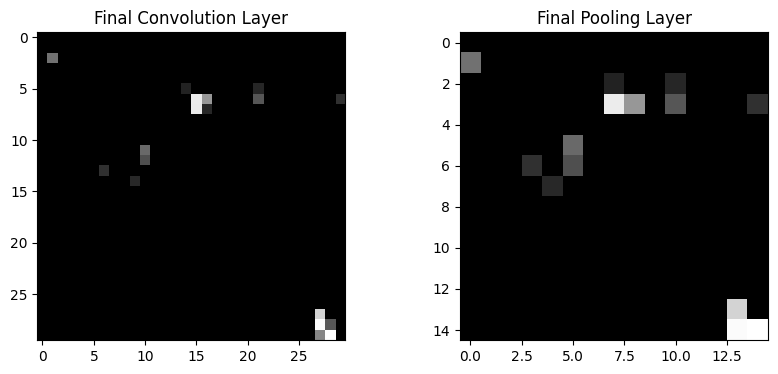

In [ ]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

def convolve2d(image, kernel, stride=1):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.sum(image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width] * kernel)
    return output

def max_pooling(image, pool_size=2, stride=2):
    pool_height, pool_width = pool_size, pool_size
    image_height, image_width = image.shape
    output_height = (image_height - pool_height) // stride + 1
    output_width = (image_width - pool_width) // stride + 1
    output = np.zeros((output_height, output_width))
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.max(image[i*stride:i*stride+pool_height, j*stride:j*stride+pool_width])
    return output

# Define a simple CNN
def simple_cnn(image):
    # Convolutional layer
    conv_kernel = np.random.randn(3, 3)
    conv_output = convolve2d(image, conv_kernel)
    conv_output = relu(conv_output)

    # Max pooling layer
    pool_output = max_pooling(conv_output)

    return conv_output, pool_output

# Test the simple CNN on a single image
image = x_train[0, :, :, 0]  # Using only the first channel for simplicity
conv_output, pool_output = simple_cnn(image)

# Visualize the output of the final convolutional layer and final pooling layer
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Final Convolution Layer")
plt.imshow(conv_output, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Final Pooling Layer")
plt.imshow(pool_output, cmap='gray')

plt.show()


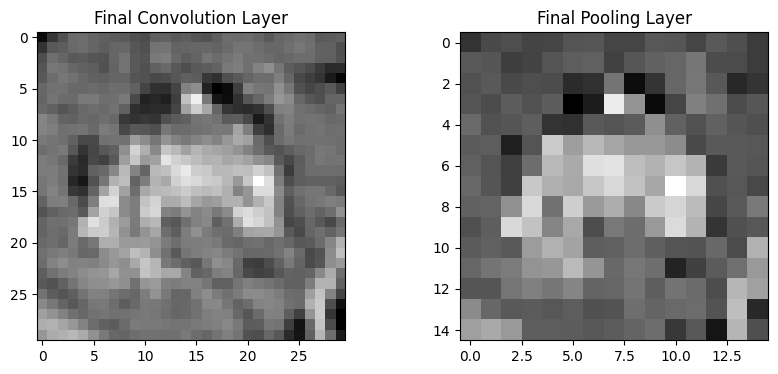

Flattened Output: [0.86080068 1.04683782 1.07369226 0.99491942 1.00708171 1.12628092
 1.14083847 1.00449173 1.00699094 1.14625835 1.13731178 1.00726967
 1.16573743 1.08716458 0.94323475 1.16382101 1.12986078 0.95073892
 0.98835532 1.12388987 1.19591604 1.22230844 0.98103139 1.14105807
 1.23862677 1.27284748 1.39504699 1.05853233 1.05615865 0.93767779
 1.11164236 1.16560095 1.04654434 1.07379124 1.06099685 0.79385237
 0.84199944 1.38278144 0.54805661 0.87129682 1.27114494 1.4098155
 1.16043618 0.77123933 0.88049182 1.13494092 1.05808118 1.18802814
 1.11207688 1.18850497 0.44867702 0.67713394 2.33944676 1.63160705
 0.53159258 1.00299349 1.47781133 1.35049057 1.0575585  1.13779342
 1.30549805 1.10800206 1.13630754 1.20651341 0.86172835 0.84418203
 1.1683682  1.12950469 1.18395808 1.59836518 1.23654618 1.10967396
 1.23048997 1.13612515 1.08584793 1.18245657 1.1992972  0.7127141
 1.12347223 2.07773375 1.71843999 1.92404178 1.77285722 1.66702542
 1.66940444 1.57403446 1.04606442 1.17015499 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

def convolve2d(image, kernel, stride=1):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.sum(image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width] * kernel)
    return output

def max_pooling(image, pool_size=2, stride=2):
    pool_height, pool_width = pool_size, pool_size
    image_height, image_width = image.shape
    output_height = (image_height - pool_height) // stride + 1
    output_width = (image_width - pool_width) // stride + 1
    output = np.zeros((output_height, output_width))
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.max(image[i*stride:i*stride+pool_height, j*stride:j*stride+pool_width])
    return output

def flatten(x):
    return x.flatten()

def fully_connected(x, weights, bias):
    return relu(np.dot(x, weights) + bias)

# Define the extended simple CNN
def simple_cnn(image):
    # Convolutional layer
    conv_kernel = np.random.randn(3, 3)
    conv_output = convolve2d(image, conv_kernel)
    conv_output = relu(conv_output)

    # Max pooling layer
    pool_output = max_pooling(conv_output)

    # Flattening layer
    flat_output = flatten(pool_output)

    # Fully connected layer
    fc_weights = np.random.randn(flat_output.shape[0], 10)  # 10 output neurons (e.g., for classification)
    fc_bias = np.random.randn(10)
    fc_output = fully_connected(flat_output, fc_weights, fc_bias)

    return conv_output, pool_output, flat_output, fc_output

# Test the extended simple CNN on a single image
image = x_train[0, :, :, 0]  # Using only the first channel for simplicity
conv_output, pool_output, flat_output, fc_output = simple_cnn(image)

# Visualize the output of the final convolutional layer and final pooling layer
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Final Convolution Layer")
plt.imshow(conv_output, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Final Pooling Layer")
plt.imshow(pool_output, cmap='gray')

plt.show()

# Print the flattened output and fully connected layer output
print("Flattened Output:", flat_output)
print("Fully Connected Layer Output:", fc_output)


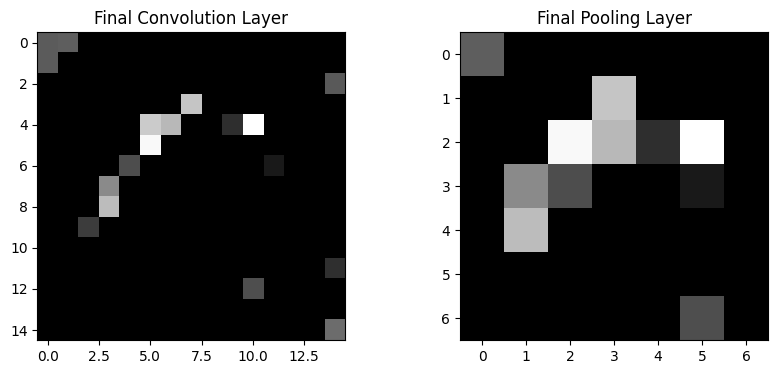

Flattened Output: [0.10117877 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.21218162 0.
 0.         0.         0.         0.         0.2684891  0.19830339
 0.05046851 0.27542998 0.         0.         0.14896848 0.08366704
 0.         0.         0.02778634 0.         0.         0.20312027
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.08493286
 0.        ]
Fully Connected Layer Output: [0.         1.42719694 0.27911014 0.         1.33001727 1.14824811
 0.         0.         0.         1.6186358 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

def convolve2d(image, kernel, stride=2):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.sum(image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width] * kernel)
    return output

def max_pooling(image, pool_size=2, stride=2):
    pool_height, pool_width = pool_size, pool_size
    image_height, image_width = image.shape
    output_height = (image_height - pool_height) // stride + 1
    output_width = (image_width - pool_width) // stride + 1
    output = np.zeros((output_height, output_width))
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.max(image[i*stride:i*stride+pool_height, j*stride:j*stride+pool_width])
    return output

def flatten(x):
    return x.flatten()

def fully_connected(x, weights, bias):
    return relu(np.dot(x, weights) + bias)

# Define the extended simple CNN
def simple_cnn(image):
    # Convolutional layer
    conv_kernel = np.random.randn(3, 3)
    conv_output = convolve2d(image, conv_kernel)
    conv_output = relu(conv_output)

    # Max pooling layer
    pool_output = max_pooling(conv_output)

    # Flattening layer
    flat_output = flatten(pool_output)

    # Fully connected layer
    fc_weights = np.random.randn(flat_output.shape[0], 10)  # 10 output neurons (e.g., for classification)
    fc_bias = np.random.randn(10)
    fc_output = fully_connected(flat_output, fc_weights, fc_bias)

    return conv_output, pool_output, flat_output, fc_output

# Test the extended simple CNN on a single image
image = x_train[0, :, :, 0]  # Using only the first channel for simplicity
conv_output, pool_output, flat_output, fc_output = simple_cnn(image)

# Visualize the output of the final convolutional layer and final pooling layer
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Final Convolution Layer")
plt.imshow(conv_output, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Final Pooling Layer")
plt.imshow(pool_output, cmap='gray')

plt.show()

# Print the flattened output and fully connected layer output
print("Flattened Output:", flat_output)
print("Fully Connected Layer Output:", fc_output)
